### OpenAI Embedding
Dot Product와 Cosine Similarity로 유사도 구하기

In [2]:
# 환경변수로 설정된 OpenAI API Key 가져오기
import os
import openai

openai.api_key = os.environ["OPENAI_API_KEY"]

### OpenAI Model API
1. List Models
2. Retrieve Model

In [3]:
# 1. List Models
models = openai.Model.list()
print("# Model List")
for model in models['data']:
    print(model["id"])

# 2. Retrieve Model
print("\n# Retrieve Model")
openai.Model.retrieve("text-embedding-ada-002")

# Model List
text-search-babbage-doc-001
gpt-4-0314
curie-search-query
text-search-babbage-query-001
babbage
gpt-3.5-turbo-instruct-0914
babbage-search-query
text-babbage-001
text-similarity-davinci-001
davinci
davinci-similarity
code-davinci-edit-001
curie-similarity
babbage-search-document
curie-instruct-beta
text-search-ada-doc-001
davinci-instruct-beta
text-similarity-babbage-001
text-search-davinci-doc-001
babbage-similarity
davinci-search-query
text-similarity-curie-001
text-davinci-001
text-search-davinci-query-001
ada-search-document
ada-code-search-code
babbage-002
gpt-4-0613
gpt-4
davinci-002
davinci-search-document
curie-search-document
babbage-code-search-code
text-search-ada-query-001
code-search-ada-text-001
babbage-code-search-text
code-search-babbage-code-001
ada-search-query
ada-code-search-text
text-search-curie-query-001
text-davinci-002
text-embedding-ada-002
text-davinci-edit-001
code-search-babbage-text-001
ada
whisper-1
text-ada-001
ada-similarity
code-search-ada

<Model model id=text-embedding-ada-002 at 0x7f5b6ba79d60> JSON: {
  "id": "text-embedding-ada-002",
  "object": "model",
  "created": 1671217299,
  "owned_by": "openai-internal",
  "permission": [
    {
      "id": "modelperm-iHRhxPwYPqj6AJE3PFzga9rD",
      "object": "model_permission",
      "created": 1695144609,
      "allow_create_engine": false,
      "allow_sampling": true,
      "allow_logprobs": true,
      "allow_search_indices": true,
      "allow_view": true,
      "allow_fine_tuning": false,
      "organization": "*",
      "group": null,
      "is_blocking": false
    }
  ],
  "root": "text-embedding-ada-002",
  "parent": null
}

## OpenAI Create Embedding API
### Request Body
1. model: string (Required)
- 사용 할 모델 명시
- List Model API로 확인 가능
2. input: string or array (Required)
- 임베딩, 인코딩 할 문장 또는 문장들
- text-embedding-ada-002의 경우 8191 토큰을 넘길 수 없음
3. User: string (Optional)

### Response Body
embedding_obj[a][b][c]   
- a
    - "object": 어떤 객체(자료형?)인지
    - "data": 임베딩 벡터
    - "model": 사용한 모델명
    - "usage": 사용한 토큰 값 (비용)

- b
    - "data" 인덱스
- c
    - "index"
    - "embedding": 임베딩 벡터 1536 길이인 듯


In [4]:
test_embedding_obj = openai.Embedding.create(
    input="Hello, World!", model="text-embedding-ada-002"
)
print(test_embedding_obj["data"][0]["embedding"])

[-0.002578443381935358, -0.005970286205410957, -0.006516838911920786, -0.03279317170381546, -0.004478518385440111, 0.0038451598957180977, -0.021334851160645485, -0.008500504307448864, -0.0016541260993108153, -0.02289091981947422, 0.03269029036164284, 0.009014906361699104, -0.01736108958721161, -0.015599261038005352, 0.013580230996012688, 0.009284968487918377, 0.027160461992025375, -0.00939427874982357, 0.005828825291246176, 0.009310688823461533, -0.004121651407331228, 0.0046103340573608875, 0.01566356047987938, -1.125569838222873e-06, -0.006944436114281416, -0.008114702068269253, 0.0006309470045380294, -0.02083330787718296, 0.03886312246322632, -0.02623453550040722, 0.011664080433547497, -0.010898906737565994, -0.003472218057140708, -0.02179781347513199, 0.01230065431445837, -0.018904298543930054, 0.0031909041572362185, -0.014287534169852734, 0.01849277690052986, -0.01350306998938322, 0.0028774398379027843, 0.008230443112552166, 0.00029176275711506605, -0.009542169980704784, -0.0338476

### OpenAI Embedding Vector Similarity
Dot Product와 Cosine Similarity로 유사도 구하기

In [12]:
import numpy as np

# 벡터 간의 코사인 유사도 계산
def cosine_similarity(vec1, vec2):
    return np.dot(vec1, vec2) / (np.linalg.norm(vec1) * np.linalg.norm(vec2))

# 한 문장 하나 하나가 "data" 안에 들어있는 원소 하나
# 원소 하나는 1536 길이의 리스트
embedding_obj_1 = openai.Embedding.create(
    input="Hello, I'm Ironman", model="text-embedding-ada-002"
)

embedding_obj_2 = openai.Embedding.create(
    input="Hello, I'm Superman", model="text-embedding-ada-002"
)


# 두 문장의 유사도 계산 - Dot Product
print("Dot Product of Two Embedding Vectors")
print(np.dot(embedding_obj_1["data"][0]["embedding"], embedding_obj_2["data"][0]["embedding"]))

# 두 문장의 유사도 계산 - Cosine Similarity
print("\nCosine Similarity of Two Embedding Vectors")
print(cosine_similarity(
    embedding_obj_1["data"][0]["embedding"], embedding_obj_2["data"][0]["embedding"]
))

Dot Product of Two Embedding Vectors
0.913016573471397

Cosine Similarity of Two Embedding Vectors
0.9130165155158321
1000.002499996875


### LangChain Embedding Vector Similarity
Dot Product와 Cosine Similarity로 유사도 구하기

In [262]:
from langchain.embeddings.openai import OpenAIEmbeddings

embedding = OpenAIEmbeddings()

sentence1 = "Hello, I'm Ironman"
sentence2 = "Hello, I'm Superman"
sentence3 = "the weather is ugly outside"
# embedding1~3은 각각 1536 길이의 리스트
embedding1 = embedding.embed_query(sentence1)
embedding2 = embedding.embed_query(sentence2)
embedding3 = embedding.embed_query(sentence3)

sim12 = np.dot(embedding1, embedding2)
sim13 = np.dot(embedding1, embedding3)
sim23 = np.dot(embedding2, embedding3)
print("\nDot Product of Embedding Vectors")
print(f"sim12={sim12:.3f}, sim13={sim13:.3f}, sim23={sim23:.3f}")
print("\nCosine Similarity of Embedding Vectors")
print(f"sim12={cosine_similarity(embedding1, embedding2):.3f}, "
      f"sim13={cosine_similarity(embedding1, embedding3):.3f}, "
      f"sim23={cosine_similarity(embedding2, embedding3):.3f}")



Dot Product of Embedding Vectors
sim12=0.913, sim13=0.738, sim23=0.740

Cosine Similarity of Embedding Vectors
sim12=0.913, sim13=0.738, sim23=0.740


### Cohere Embedding
임베딩 벡터 시각화 & 유사도 구하기   
근데 umap이 예제와 다르게 사용 불가임   
그래서 matplot씀

/usr/local/lib/python3.8/dist-packages/umap/umap_.py:2433: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


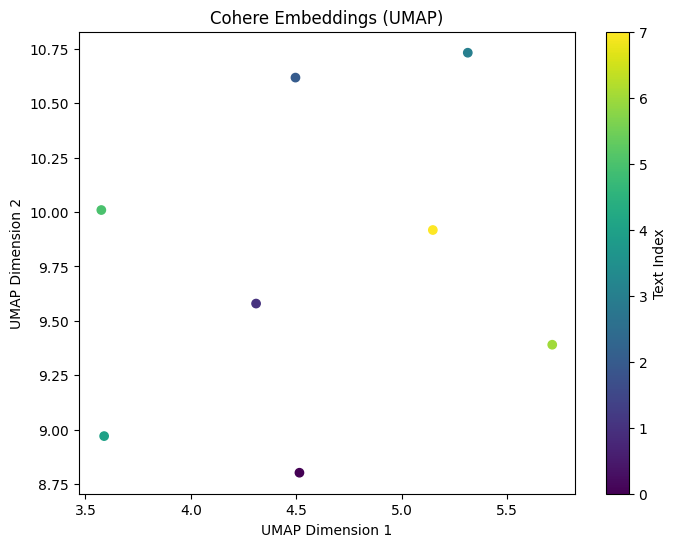

In [263]:
import cohere
import os
import pandas as pd
import matplotlib.pyplot as plt
import umap

co = cohere.Client(os.environ['COHERE_API_KEY'])

sentences = pd.DataFrame({'text':
[
'Where is the world cup?',
'The world cup is in Qatar',
'What color is the sky?',
'The sky is blue',
'Where does the bear live?',
'The bear lives in the the woods',
'What is an apple?',
'What is an banana?',
]})

emb = co.embed(texts=list(sentences['text']), model='embed-english-v2.0').embeddings

# UMAP를 사용하여 임베딩 데이터 차원 축소
reducer = umap.UMAP()
embedding_umap = reducer.fit_transform(emb)

# 시각화
plt.figure(figsize=(8, 6))
plt.scatter(embedding_umap[:, 0], embedding_umap[:, 1], c=range(len(sentences)), cmap='viridis')
plt.colorbar(label='Text Index')
plt.title('Cohere Embeddings (UMAP)')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.show()

In [264]:
# 두 문장을 임베딩하여 벡터 얻기
sentence1 = "Hello, I'm Ironman"
sentence2 = "Hello, I'm Superman"

#emb1은 리스트[1][4096] : [문장 개수][임베딩 벡터 길이]
emb1 = co.embed(texts=[sentence1], model='embed-english-v2.0').embeddings
emb2 = co.embed(texts=[sentence2], model='embed-english-v2.0').embeddings

dot_product = np.dot(emb1[0], emb2[0])
similarity_score = cosine_similarity(emb1[0], emb2[0])
print("두 벡터의 내적:", dot_product)
print("두 벡터의 코사인 유사도:", similarity_score)

두 벡터의 내적: 6282.788630308731
두 벡터의 코사인 유사도: 0.7734923180740333


### 만약 임베딩 벡터가 엄청 많아진다면?
모든 인접 벡터 간의 유사도를 구하는 시간 복잡도가 커져 힘들어진다.   
그래서 더 빠른 검색을 위한 테크닉들이 나오게 됨   
#### Annoy (Approximate Nearest Neighbors Oh Yeah)
- 빠르게 벡터 유사도 검색 수행이 가능한 라이브러리
- 정확한 벡터보다는 유사한 벡터를 찾기에 정확도는 조금 낮아질 수 있으나 속도가 매우 빨라짐
- Tree를 활용하여 유사한 벡터 검색

### ANNOY API
- AnnoyIndex(f, metrix): Class
    - f: length of vector
    - f: 거리 계산 방법
- AnnoyIndex.add_item(i, v)
    - i번째에 벡터 v 추가
- AnnoyIndex.build(n_trees)
    - n_trees 개수의 트리로 구축
    - 많은 트리를 만들면 정확도 올라감
    - 한번 빌드 후엔 더 이상 아이템 추가 X
- AnnoyIndex.save(filename.annoy)
    - 저장
- AnnoyIndex.load(filename.annoy)
    - 불러오기
- AnnoyIndex.get_nns_by_vector(v, n, search_k=-1, include_distances=False)
    - 벡터 v와 유사한 n개의 아이템 반환
    - include_distances=False라면 AnnoyIndex의 Index만 반환하고,
    True라면 Index와 Distance를 Tuple로 반환
    - 최대 search_k 노드까지 검사하며, 기본 값은 n_trees * n



In [265]:
from annoy import AnnoyIndex
import os
import openai
import pandas as pd

openai.api_key = os.environ["OPENAI_API_KEY"]

# 텍스트 데이터를 임베딩하는 함수 정의
def embed_text(text):
    return co.embed(texts=[text]).embeddings

# 임베딩할 텍스트 데이터 정의
texts = [
    "I like to play soccer",
    "She enjoys reading books",
    "They go for a walk in the park",
    "He is a talented musician",
    "She paints beautiful pictures",
    "The sun sets over the mountains",
    "Cooking is my favorite hobby",
    "I want to travel the world",
    "Learning new languages is challenging",
    "The ocean waves crash against the shore",
    "I enjoy solving puzzles",
    "Gardening is a relaxing activity",
    "Hiking in the forest is peaceful",
    "The city never sleeps",
    "Music soothes the soul",
]


In [266]:
# 각 텍스트를 임베딩하여 embeds 배열에 저장, embeds는 [15][4096] 배열
embeds = [embed_text(text)[0] for text in texts]

# 'embeds' 배열에는 텍스트 데이터의 임베딩 벡터가 포함됩니다.
search_index = AnnoyIndex(len(embeds[0]), 'angular')

# Add all the vectors to the search index
for i in range(len(embeds)):
    search_index.add_item(i, embeds[i])

search_index.build(10) # 10 trees

# 텍스트 쿼리 정의
query = "He enjoys reading books"
# 쿼리의 임베딩 벡터 구하기
query_embed = embed_text(query)
# n개의 가장 가까운 이웃을 찾기
similar_item_ids = search_index.get_nns_by_vector(query_embed[0], 3, include_distances=True)
# Format the results
results = pd.DataFrame(data={'texts': [texts[i] for i in similar_item_ids[0]], 'distance': similar_item_ids[1]})
    
print(results)

                          texts  distance
0      She enjoys reading books  0.556793
1       I enjoy solving puzzles  0.963498
2  Cooking is my favorite hobby  0.994332
